<a href="https://colab.research.google.com/github/willdphan/age-related-conditions/blob/main/Age_Related_Conditions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Age-Related Conditions

The competition dataset contains anonymized health metrics linked to age-related conditions, aiming to predict a binary outcome of diagnosis. It includes a training set with unique identifiers, fifty-six health characteristics (mostly numeric, with one categorical), and a binary target indicating diagnosis:

* `class 1` for one or more of any of the three medical conditions
* `class 0` for no diagnosis

Luckily, the classes are already given!

The test set requires predicting the probability of a diagnosis. Additionally, there's a supplemental metadata file for the training set, detailing the type of age-related condition, three experimental characteristics, and the data collection date.

## Greeks

Alpha Identifies the type of age-related condition, if present.

* `A` No age-related condition. Corresponds to class 0.

* `B, D, G` The three age-related conditions. Correspond to class 1.
Beta, Gamma, Delta Three experimental characteristics.


Dataset is from [Kaggle](https://www.kaggle.com/competitions/icr-identify-age-related-conditions).

> ## Steps to Age Related Conditions

>>[Import Libraries](#scrollTo=0YUm71dXUPpO)

>>[Read Data](#scrollTo=D4ulVNMwUPpQ)

>>[Clean Data](#scrollTo=m33tsfl2UPpQ)

>>[Display Data](#scrollTo=z2P7qwTpUPpR)

>>[Grab Top 25 Important Variables using ANOVA.](#scrollTo=TfA4_U6KUPpR)

>>[Correct Imbalance to Avoid Bias](#scrollTo=egnngyTYUPpR)

>>[Normalize Data](#scrollTo=qics-V9xUPpS)

>>[Build Models](#scrollTo=YJy7ng7GUPpZ)

>>[Hyperparameter Tuning](#scrollTo=B6SP8XxLUPpe)



### Import Libraries

Import the libraries uses for data analysis, modeling.

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Metrics
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

# Warnings
import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/icr-identify-age-related-conditions/sample_submission.csv
/kaggle/input/icr-identify-age-related-conditions/greeks.csv
/kaggle/input/icr-identify-age-related-conditions/train.csv
/kaggle/input/icr-identify-age-related-conditions/test.csv


### Read Data

In [ ]:
df = pd.read_csv('/kaggle/input/icr-identify-age-related-conditions/train.csv')
df

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
0,000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,...,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1
1,007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,...,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0
2,013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,...,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0
3,043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,...,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0
4,044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,...,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,fd3dafe738fd,0.149555,3130.05946,123.763599,9.513984,13.020852,3.499305,0.077343,8.545512,2.804172,...,0.173229,1.26092,0.067730,8.967128,217.148554,8095.932828,24.640462,69.191944,21.978000,0
613,fd895603f071,0.435846,5462.03438,85.200147,46.551007,15.973224,5.979825,0.025882,12.622906,3.777550,...,10.223150,1.24236,0.426699,35.896418,496.994214,3085.308063,29.648928,124.808872,0.145340,0
614,fd8ef6377f76,0.427300,2459.10720,130.138587,55.355778,10.005552,8.070549,0.025578,15.408390,1.229900,...,0.173229,0.49706,0.067730,19.962092,128.896894,6474.652866,26.166072,119.559420,21.978000,0
615,fe1942975e40,0.363205,1263.53524,85.200147,23.685856,8.138688,7.981959,0.025578,7.524588,1.229900,...,9.256996,0.78764,0.670527,24.594488,72.611063,1965.343176,25.116750,37.155112,0.184622,0


### Clean Data
**ID** does not seem important, so we drop the `Id` column.

In [ ]:
df.drop('Id', inplace=True, axis=1)
df

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
0,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,4126.58731,...,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1
1,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,5496.92824,...,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0
2,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,5135.78024,...,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0
3,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,4169.67738,...,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0
4,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,5728.73412,...,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,0.149555,3130.05946,123.763599,9.513984,13.020852,3.499305,0.077343,8.545512,2.804172,4157.68439,...,0.173229,1.26092,0.067730,8.967128,217.148554,8095.932828,24.640462,69.191944,21.978000,0
613,0.435846,5462.03438,85.200147,46.551007,15.973224,5.979825,0.025882,12.622906,3.777550,5654.07556,...,10.223150,1.24236,0.426699,35.896418,496.994214,3085.308063,29.648928,124.808872,0.145340,0
614,0.427300,2459.10720,130.138587,55.355778,10.005552,8.070549,0.025578,15.408390,1.229900,5888.87769,...,0.173229,0.49706,0.067730,19.962092,128.896894,6474.652866,26.166072,119.559420,21.978000,0
615,0.363205,1263.53524,85.200147,23.685856,8.138688,7.981959,0.025578,7.524588,1.229900,4517.86560,...,9.256996,0.78764,0.670527,24.594488,72.611063,1965.343176,25.116750,37.155112,0.184622,0


In [ ]:
df.dtypes

AB       float64
AF       float64
AH       float64
AM       float64
AR       float64
AX       float64
AY       float64
AZ       float64
BC       float64
BD       float64
BN       float64
BP       float64
BQ       float64
BR       float64
BZ       float64
CB       float64
CC       float64
CD       float64
CF       float64
CH       float64
CL       float64
CR       float64
CS       float64
CU       float64
CW       float64
DA       float64
DE       float64
DF       float64
DH       float64
DI       float64
DL       float64
DN       float64
DU       float64
DV       float64
DY       float64
EB       float64
EE       float64
EG       float64
EH       float64
EJ        object
EL       float64
EP       float64
EU       float64
FC       float64
FD       float64
FE       float64
FI       float64
FL       float64
FR       float64
FS       float64
GB       float64
GE       float64
GF       float64
GH       float64
GI       float64
GL       float64
Class      int64
dtype: object

`EJ` is an object and we want to convert to numerical data.

In [ ]:
le = LabelEncoder()
df['EJ'] = le.fit_transform(df['EJ'])
df['EJ']

0      1
1      0
2      1
3      1
4      1
      ..
612    0
613    1
614    0
615    1
616    0
Name: EJ, Length: 617, dtype: int64

In [ ]:
df.isnull().sum()

AB        0
AF        0
AH        0
AM        0
AR        0
AX        0
AY        0
AZ        0
BC        0
BD        0
BN        0
BP        0
BQ       60
BR        0
BZ        0
CB        2
CC        3
CD        0
CF        0
CH        0
CL        0
CR        0
CS        0
CU        0
CW        0
DA        0
DE        0
DF        0
DH        0
DI        0
DL        0
DN        0
DU        1
DV        0
DY        0
EB        0
EE        0
EG        0
EH        0
EJ        0
EL       60
EP        0
EU        0
FC        1
FD        0
FE        0
FI        0
FL        1
FR        0
FS        2
GB        0
GE        0
GF        0
GH        0
GI        0
GL        1
Class     0
dtype: int64

Drop empty values and view remaining null values (if any).

In [ ]:
df.dropna(inplace=True, axis=1)
df.isnull().sum()

AB       0
AF       0
AH       0
AM       0
AR       0
AX       0
AY       0
AZ       0
BC       0
BD       0
BN       0
BP       0
BR       0
BZ       0
CD       0
CF       0
CH       0
CL       0
CR       0
CS       0
CU       0
CW       0
DA       0
DE       0
DF       0
DH       0
DI       0
DL       0
DN       0
DV       0
DY       0
EB       0
EE       0
EG       0
EH       0
EJ       0
EP       0
EU       0
FD       0
FE       0
FI       0
FR       0
GB       0
GE       0
GF       0
GH       0
GI       0
Class    0
dtype: int64

View the ratio of class 0 and class 1.

In [ ]:
split = df['Class'].value_counts()
split

0    509
1    108
Name: Class, dtype: int64

### Display Data
Create a pie graph and bar graph to show the imbalanced ratio between `class 1` and `class 0`.

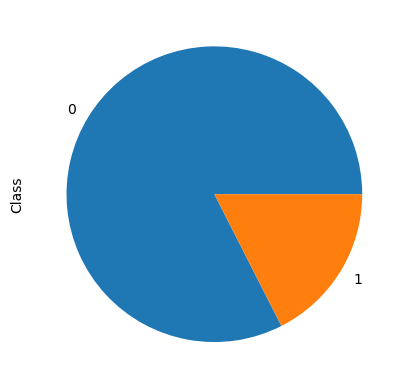

In [ ]:
plot_df = df.Class.value_counts()

plot_df.plot(kind="pie")
plt.show()

Another method to see the imbalanced ratio.

[]

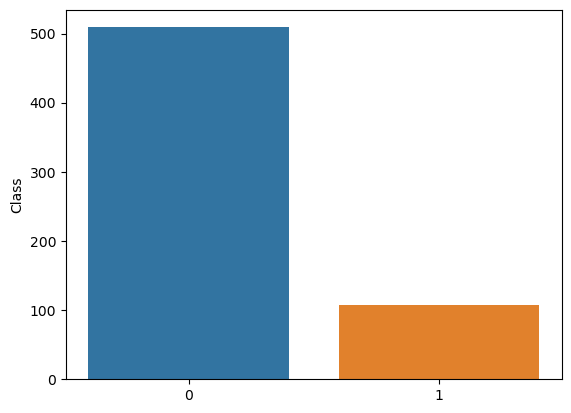

In [ ]:
x = df['Class'].value_counts().astype(np.int32)
sns.barplot(x=x.keys(), y=x)
plt.plot()

Grab the X column data without the class column data. In other words, exclude outcome or y column.

In [ ]:
X = df.iloc[ : , : -1]
X

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,EU,FD,FE,FI,FR,GB,GE,GF,GH,GI
0,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,4126.58731,...,3.828384,10.265073,9028.291921,3.583450,1.73855,11.339138,72.611063,2003.810319,22.136229,69.834944
1,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,5496.92824,...,52.260480,0.296850,6785.003474,10.358927,0.49706,9.292698,72.611063,27981.562750,29.135430,32.131996
2,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,5135.78024,...,5.390628,8.745201,8338.906181,11.626917,0.97556,37.077772,88.609437,13676.957810,28.022851,35.192676
3,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,4169.67738,...,31.323372,7.884336,10965.766040,14.852022,0.49706,18.529584,82.416803,2094.262452,39.948656,90.493248
4,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,5728.73412,...,51.141336,4.274640,16198.049590,13.666727,48.50134,16.408728,146.109943,8524.370502,45.381316,36.262628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,0.149555,3130.05946,123.763599,9.513984,13.020852,3.499305,0.077343,8.545512,2.804172,4157.68439,...,65.821872,0.296850,17167.209610,9.879296,1.26092,8.967128,217.148554,8095.932828,24.640462,69.191944
613,0.435846,5462.03438,85.200147,46.551007,15.973224,5.979825,0.025882,12.622906,3.777550,5654.07556,...,447.657600,6.067614,18460.330020,10.910227,1.24236,35.896418,496.994214,3085.308063,29.648928,124.808872
614,0.427300,2459.10720,130.138587,55.355778,10.005552,8.070549,0.025578,15.408390,1.229900,5888.87769,...,3.828384,0.296850,5088.922912,12.029366,0.49706,19.962092,128.896894,6474.652866,26.166072,119.559420
615,0.363205,1263.53524,85.200147,23.685856,8.138688,7.981959,0.025578,7.524588,1.229900,4517.86560,...,8.259384,6.192291,6464.250832,8.026928,0.78764,24.594488,72.611063,1965.343176,25.116750,37.155112


Grab the y column or outcome data.

In [ ]:
y = df.iloc[ : , -1]
y

0      1
1      0
2      0
3      0
4      1
      ..
612    0
613    0
614    0
615    0
616    0
Name: Class, Length: 617, dtype: int64

### Grab Top 25 Important Variables using ANOVA.

Now, out of the data, we want to select the top 25 important variables using ANOVA. ANOVA (Analysis of Variance) is a statistical method that is used to determine the significance of groups of variables and it can be used for feature selection.

Some features may add noise, redundancy or could be irrelevant, which can negatively impact the performance of the model. Therefore, feature selection techniques are used to select the most relevant features in your dataset.

Print the top 25 column labels.

In [ ]:
selector = SelectKBest(score_func=f_classif, k=25)
X_selected = selector.fit_transform(X,y)

# Get the selected feature indices
feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = X.columns[feature_indices]

# Create a new DataFrame with only the selected features
selected_data = df[selected_features]
# Print the selected features
print(selected_features)

Index(['AB', 'AF', 'AM', 'AX', 'BC', 'BD ', 'BN', 'BP', 'BZ', 'CD ', 'CF',
       'CR', 'DA', 'DE', 'DH', 'DI', 'DL', 'EE', 'EH', 'EJ', 'FD ', 'FE', 'FI',
       'FR', 'GF'],
      dtype='object')


Use the top 25 column labels to recreate the dataframe.

In [ ]:
selected_vars = df[['AB', 'AF', 'AM', 'AX', 'BC', 'BD ', 'BN', 'BP', 'BZ', 'CD ', 'CF',
       'CR', 'DA', 'DE', 'DH', 'DI', 'DL', 'EE', 'EH', 'EJ', 'FD ', 'FE', 'FI',
       'FR', 'GF']]

x = selected_vars
x

,AB,AF,AM,AX,BC,BD,BN,BP,BZ,CD,...,DI,DL,EE,EH,EJ,FD,FE,FI,FR,GF
0,0.209377,3109.03329,22.394407,0.699861,5.555634,4126.58731,22.5984,175.638726,257.432377,23.387600,...,89.245560,84.31664,1.987283,0.949104,1,10.265073,9028.291921,3.583450,1.73855,2003.810319
1,0.145282,978.76416,36.968889,3.632190,1.229900,5496.92824,19.4205,155.868030,257.432377,50.628208,...,110.581815,75.74548,0.858603,0.003042,0,0.296850,6785.003474,10.358927,0.49706,27981.562750
2,0.470030,2635.10654,32.360553,6.732840,1.229900,5135.78024,26.4825,128.988531,257.432377,85.955376,...,120.056438,65.46984,8.146651,0.377208,1,8.745201,8338.906181,11.626917,0.97556,13676.957810
3,0.252107,3819.65177,77.112203,3.685344,1.229900,4169.67738,23.6577,237.282264,257.432377,88.159360,...,139.824570,71.57120,3.813326,0.614484,1,7.884336,10965.766040,14.852022,0.49706,2094.262452
4,0.380297,3733.04844,14.103738,3.942255,102.151980,5728.73412,24.0108,324.546318,257.432377,72.644264,...,97.920120,52.83888,3.490846,0.164268,1,4.274640,16198.049590,13.666727,48.50134,8524.370502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,0.149555,3130.05946,9.513984,3.499305,2.804172,4157.68439,21.1860,167.877117,257.432377,55.163024,...,176.977590,90.91832,1.354416,0.003042,0,0.296850,17167.209610,9.879296,1.26092,8095.932828
613,0.435846,5462.03438,46.551007,5.979825,3.777550,5654.07556,27.1887,285.628059,257.432377,85.233928,...,192.598575,123.17624,0.753797,0.139932,1,6.067614,18460.330020,10.910227,1.24236,3085.308063
614,0.427300,2459.10720,55.355778,8.070549,1.229900,5888.87769,20.4798,178.661133,257.432377,142.680216,...,218.915925,326.23620,2.225112,0.003042,0,0.296850,5088.922912,12.029366,0.49706,6474.652866
615,0.363205,1263.53524,23.685856,7.981959,1.229900,4517.86560,19.0674,119.162529,257.432377,122.939496,...,113.526045,96.97092,1.628524,0.139932,1,6.192291,6464.250832,8.026928,0.78764,1965.343176


### Correct Imbalance to Avoid Bias

The `RandomOverSampler` is a technique used to handle imbalanced data sets. It works by randomly duplicating examples in the minority class (class 1), in this case, making more copies of the minority class instances until the classes are balanced.

Overall, this is done to avoid bias in the model on untrained data.

In [ ]:
from imblearn.over_sampling import RandomOverSampler
sm = RandomOverSampler()
x,y = sm.fit_resample(x,y)

### Normalize Data
`MinMaxScaler` is a technique in feature scaling that helps to normalize the data. It essentially scales and translates each feature individually such that it is in the given range on the training set, i.e., between zero and one.

In [ ]:
#minmaxscaler
ms = MinMaxScaler()
Xsc = ms.fit_transform(x)
Xsc

array([[2.10822207e-02, 1.02347050e-01, 3.06322940e-02, ...,
        0.00000000e+00, 9.98198998e-04, 1.38462409e-02],
       [1.05411103e-02, 2.75892080e-02, 5.38644577e-02, ...,
        2.09977789e-01, 0.00000000e+00, 1.94527063e-01],
       [6.39494027e-02, 8.57154698e-02, 4.65186311e-02, ...,
        2.49273877e-01, 3.84729817e-04, 9.50354775e-02],
       ...,
       [2.52986648e-02, 4.96921496e-02, 1.41288679e-02, ...,
        3.57081838e-01, 3.22473538e-04, 1.59245422e-02],
       [8.85453268e-02, 1.39095166e-01, 4.32110345e-02, ...,
        1.86570989e-01, 7.45676336e-04, 4.92791254e-02],
       [1.08924807e-01, 2.40740094e-01, 2.76209001e-02, ...,
        1.14129506e-01, 0.00000000e+00, 7.62084991e-02]])

Now we finally can split the data.

In [ ]:
#splitting to test and train data
X_train, X_test, y_train, y_test = train_test_split(Xsc,y,test_size=0.1,random_state=4)

### Build Models
Create a dictionary of classifiers

In [ ]:
# Create a dictionary of classifiers
classifiers = {
    "KNN": KNeighborsClassifier(algorithm='auto',n_neighbors=9,weights='distance'),
    "SVC": SVC(C=10, gamma =1, kernel= 'rbf'),
    "GNB": GaussianNB(),
    "RF": RandomForestClassifier(criterion= 'entropy', max_depth= None, min_samples_leaf= 1, min_samples_split= 4,n_estimators= 200),
    "XGB": XGBClassifier()
}

Create an empty dictionary to store the cross-validation scores. Then, we use a for loop to to grab the prediction of every model and create a classification report for each.

We display the classification reports below as well as the 5-fold cross-validation accuracy scores for a given pipeline.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

# Dictionary to store the cross-validation scores
cv_scores = {}

# Cross-validation and store the results
for name, classifier in classifiers.items():
    pipeline = Pipeline([
        ('classifier', classifier)
    ])
    pipeline.fit(X_train, y_train)
    predictions = pipeline.predict(X_test)
    print(f"Classification report for {name}:\n")
    print(classification_report(y_test, predictions))

    scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores[name] = scores

cv_scores

Classification report for KNN:

              precision    recall  f1-score   support

           0       1.00      0.86      0.92        49
           1       0.88      1.00      0.94        53

    accuracy                           0.93       102
   macro avg       0.94      0.93      0.93       102
weighted avg       0.94      0.93      0.93       102

Classification report for SVC:

              precision    recall  f1-score   support

           0       0.85      0.82      0.83        49
           1       0.84      0.87      0.85        53

    accuracy                           0.84       102
   macro avg       0.84      0.84      0.84       102
weighted avg       0.84      0.84      0.84       102

Classification report for GNB:

              precision    recall  f1-score   support

           0       0.57      0.96      0.72        49
           1       0.90      0.34      0.49        53

    accuracy                           0.64       102
   macro avg       0.74      0.6

{'KNN': array([0.91847826, 0.90710383, 0.93989071, 0.8852459 , 0.8579235 ]),
 'SVC': array([0.90217391, 0.8579235 , 0.91803279, 0.84153005, 0.89617486]),
 'GNB': array([0.625     , 0.66666667, 0.73770492, 0.66666667, 0.70491803]),
 'RF': array([0.98369565, 1.        , 0.97814208, 0.95628415, 0.98360656]),
 'XGB': array([0.9673913 , 0.96174863, 0.97814208, 0.93989071, 0.9726776 ])}

Find the best Model with the highest mean score. **Random Forest** was the best model with a validation score of `0.975`!

In [ ]:
# Find the model with the highest mean score
best_model_name = max(cv_scores, key=lambda k: np.mean(cv_scores[k]))
best_model = classifiers[best_model_name]
best_score = np.mean(cv_scores[best_model_name])

print(f"The best model is {best_model_name} with a cross-validation score of {best_score}!")

The best model is RF with a cross-validation score of 0.9803456878118318!


### Hyperparameter Tuning

Use `GridSearchCV` from `Sklearn` in order to define a hyperparameter grid for a **Random Forest** classifier.
It specifies:
* different values to test for the number of trees (`n_estimators`)
* maximum depth of trees (`max_depth`)
* minimum samples required to split an internal node (`min_samples_split`)
* minimum number of samples required to be at a leaf node (`min_samples_leaf`)

In [ ]:
# Hyperparameter grid for Random Forest
param_grid_rf = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 5, 10],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
}

In [ ]:
# SK Pipelines for the classifiers/models
pipeline_rf = Pipeline([
    ('classifier', RandomForestClassifier(random_state=42))
])

Conduct a grid search for the best hyperparameters of a Random Forest classifier.
It uses:

* A pipeline (`pipeline_rf`) which likely includes preprocessing steps followed by the Random Forest classifier.
* The hyperparameter grid (`param_grid_rf`) you mentioned earlier.
* A 5-fold cross-validation (`cv=5`).
* Accuracy as the performance metric (`scoring='accuracy'`).
* Parallel processing with `n_jobs=-1` to speed up the search by using all available CPU cores.

After setting these configurations, it fits the grid search on the training data (`X_train and y_train`). Once this process is complete, the best hyperparameters for the Random Forest model will have been identified based on accuracy.

In [ ]:
# Grid Search
# For RF, attach pipeline and hyperparams to grid search, set num of CVs
# n_jobs=-1: The number of jobs is set to the number of CPU cores in your machine
grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('classifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [None, 5, 10],
                         'classifier__min_samples_leaf': [1, 2, 4],
                         'classifier__min_samples_split': [2, 5, 10],
                         'classifier__n_estimators': [100, 200, 300]},
             scoring='accuracy')

Grab the best **Random Forest model** with the best parameters.

In [ ]:
# grab best RF model
best_model_rf, best_score_rf = grid_search_rf.best_estimator_, grid_search_rf.best_score_

Make predictions on the unseen data with the best model and calculate the accuracy scores by getting the test and prediction ratio.

In [ ]:
# Make predictions on the unseen test set using the Random Forest model
y_pred_rf = best_model_rf.predict(X_test)

# Calculate accuracy scores by getting y_test to y_pred ratio
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print("Classification report for Random Forests Classifier")
print(classification_report(y_test, y_pred_rf))
print(f'The accuracy of Random Forests Classifier is {accuracy_rf}')

Classification report for Random Forests Classifier
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        49
           1       0.98      1.00      0.99        53

    accuracy                           0.99       102
   macro avg       0.99      0.99      0.99       102
weighted avg       0.99      0.99      0.99       102

The accuracy of Random Forests Classifier is 0.9901960784313726
